In [1]:
pwd

'/home/ezequiel/examples'

In [2]:
cd ..

/home/ezequiel


In [3]:
ls

Desktop/    Downloads/  Music/     Public/      snap/      Templates/
Documents/  examples/   Pictures/  pyLIMA-env/  software/  Videos/


In [4]:
cd pyLIMA-env

/home/ezequiel/pyLIMA-env


In [5]:
ls

bin/  etc/  include/  lib/  lib64@  LICENSE  pyLIMA/  pyvenv.cfg  share/


In [6]:
cd pyLIMA

/home/ezequiel/pyLIMA-env/pyLIMA


In [7]:
ls

Dockerfile  examples/    LICENSE      pyLIMA/         README.md
docs/       __init__.py  MANIFEST.in  pyproject.toml  readthedocs.yaml


In [8]:
cd pyLIMA

/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA


In [9]:
ls

astrometry/  fits/           orbitalmotion/  __pycache__/   tests/
caustics/    __init__.py     outputs/        simulations/   toolbox/
data/        magnification/  parallax/       stars/
event.py     models/         priors/         telescopes.py


In [10]:
cd ..

/home/ezequiel/pyLIMA-env/pyLIMA


In [11]:
import pyLIMA

In [12]:
# importing the necessary libs

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import os,sys

from pyLIMA import event 
from pyLIMA import telescopes

In [13]:
pwd

'/home/ezequiel/pyLIMA-env/pyLIMA'

In [14]:
# creating a new EVENT object and giving it a name

your_event = event.Event()
your_event.name = 'My event name'

simulating I-band data sets from OGLE and LCO

data sets are preformatted: column 1 is the date, column 2 is the magnitude, and column 3 is the uncertainty in the magnitude

In [15]:
# loading up the data sets

data_1 = np.loadtxt('examples/data/Survey_1.dat')   # data files in the form of .txt files
#print(data_1)
telescope_1 = telescopes.Telescope(name = 'OGLE', 
                                   camera_filter = 'I',
                                   light_curve = data_1.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

data_2 = np.loadtxt('examples/data/Followup_1.dat')
telescope_2 = telescopes.Telescope(name = 'LCO',
                                 camera_filter = 'I',
                                 light_curve = data_2.astype(float),
                                 light_curve_names = ['time','mag','err_mag'],
                                 light_curve_units = ['JD','mag','mag'])

In [16]:
# appending the two telescope data sets to the EVENT object previously defined

your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)

In [17]:
# defining a survey telescope that we will want to use to align all other data sets to

your_event.find_survey('OGLE')

In [18]:
your_event.check_event()

check_event  : Everything looks fine...


construt the model that we will want to fit and we will want to link it to the EVENT that we prepared already

MODEL: PSPL (Point Source - Point Lens)

In [19]:
from pyLIMA.models import PSPL_model
pspl = PSPL_model.PSPLmodel(your_event)

we will now fit the event with a simple Levenvberg_Marquardt (LM) algorithm

we first need to define the fitting algorithm that we want to use for the model you prepared

In [20]:
from pyLIMA.fits import LM_fit

initialize the fit by declaring a simple FIT object using the model that we defined

In [21]:
my_fit = LM_fit.LMfit(pspl)

we can, likewise, take a look at the parameters

In [22]:
my_fit.fit_parameters

OrderedDict([('t0', [0, (1.0, 182.32999999999993)]),
             ('u0', [1, (0.0, 1.0)]),
             ('tE', [2, (0.1, 500)]),
             ('fsource_OGLE', [3, (0.0, 257268.11445883513)]),
             ('fblend_OGLE', [4, (-257268.11445883513, 257268.11445883513)]),
             ('fsource_LCO', [5, (0.0, 8534180.293895919)]),
             ('fblend_LCO', [6, (-8534180.293895919, 8534180.293895919)])])

In [23]:
my_fit.fit()

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [80.2659253054013, 0.012201973710850926, 10.948617613093674, 2142.184109625049, 1018.8064063680258, 118934.71374344983, -754871.6968949221]
fit  : Levenberg-Marquardt fit SUCCESS
best_model: [79.9637591248658, 0.011068543816646308, 9.607658761956916, 3153.12655617482, -23.733609566216263, 106079.5725072143, -47096.03629716528]  chi2: 8440.169492852549


In [24]:
my_fit.fit_results

{'best_model': [79.9637591248658,
  0.011068543816646308,
  9.607658761956916,
  3153.12655617482,
  -23.733609566216263,
  106079.5725072143,
  -47096.03629716528],
 'chi2': 8440.169492852549,
 'fit_time': 0.1319260597229004,
 'covariance_matrix': array([[ 3.79521834e-07,  1.29314934e-09,  6.21721594e-06,
         -3.00846945e-03,  2.96134229e-03, -8.76802413e-02,
         -8.97569203e-03],
        [ 1.29314934e-09,  7.28967341e-09, -3.31602915e-06,
          1.40368024e-03, -1.36358039e-03,  4.61161035e-02,
          4.72059601e-03],
        [ 6.21721594e-06, -3.31602915e-06,  2.54107766e-03,
         -1.04991048e+00,  1.01736825e+00, -2.95838488e+01,
         -3.02848739e+00],
        [-3.00846945e-03,  1.40368024e-03, -1.04991048e+00,
          4.48545893e+02, -4.36225922e+02,  1.23723833e+04,
          1.26656915e+03],
        [ 2.96134229e-03, -1.36358039e-03,  1.01736825e+00,
         -4.36225922e+02,  4.26643450e+02, -1.20042015e+04,
         -1.22888095e+03],
        [-8.76802

In [25]:
my_fit.fit_results['best_model']

[79.9637591248658,
 0.011068543816646308,
 9.607658761956916,
 3153.12655617482,
 -23.733609566216263,
 106079.5725072143,
 -47096.03629716528]

In [26]:
my_fit.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE', 'fsource_OGLE', 'fblend_OGLE', 'fsource_LCO', 'fblend_LCO'])

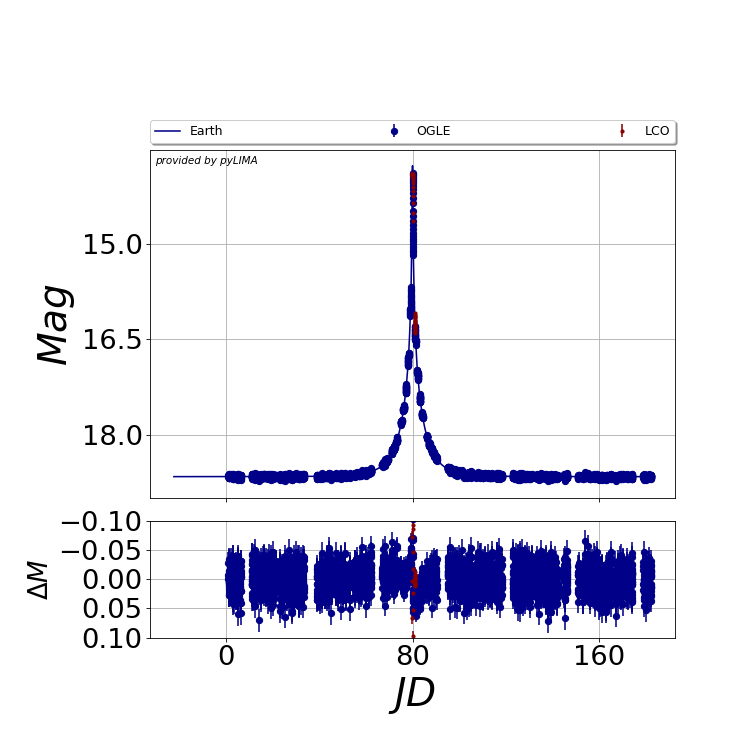

In [27]:
from pyLIMA.outputs import pyLIMA_plots
pyLIMA_plots.plot_lightcurves(pspl, my_fit.fit_results['best_model'])
plt.show()

we will now try with a different algorithm - the differential evolution (DE) algorithm

In [28]:
from pyLIMA.fits import DE_fit
my_fit2 = DE_fit.DEfit(pspl)
my_fit2.fit()

DE converge to objective function : f(x) =  22707.39012680707
DE converge to parameters : =  ['79.96371345663395' '0.011063771187867832' '9.60084920808012']
fit  : Differential Evolution fit SUCCESS
best_model: [7.99637135e+01 1.10637712e-02 9.60084921e+00] -ln(likelihood) 22707.39012680707


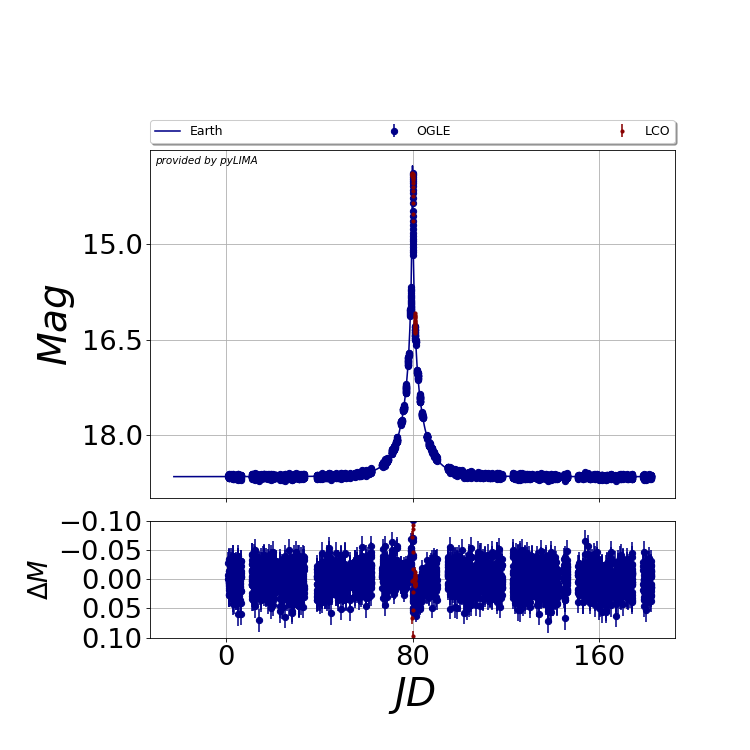

In [29]:
pyLIMA_plots.plot_lightcurves(pspl,my_fit2.fit_results['best_model'])
plt.show()

we will now need to import the FSPL model since there is strong evidence of finite source effects

In [30]:
from pyLIMA.models import FSPL_model
fspl = FSPL_model.FSPLmodel(your_event)

In [31]:
my_fit3 = DE_fit.DEfit(fspl)
my_fit3.fit()

DE converge to objective function : f(x) =  20467.96666478133
DE converge to parameters : =  ['79.93070149391573' '0.008477086044221482' '10.10013655658014'
 '0.021574576021422348']
fit  : Differential Evolution fit SUCCESS
best_model: [7.99307015e+01 8.47708604e-03 1.01001366e+01 2.15745760e-02] -ln(likelihood) 20467.96666478133


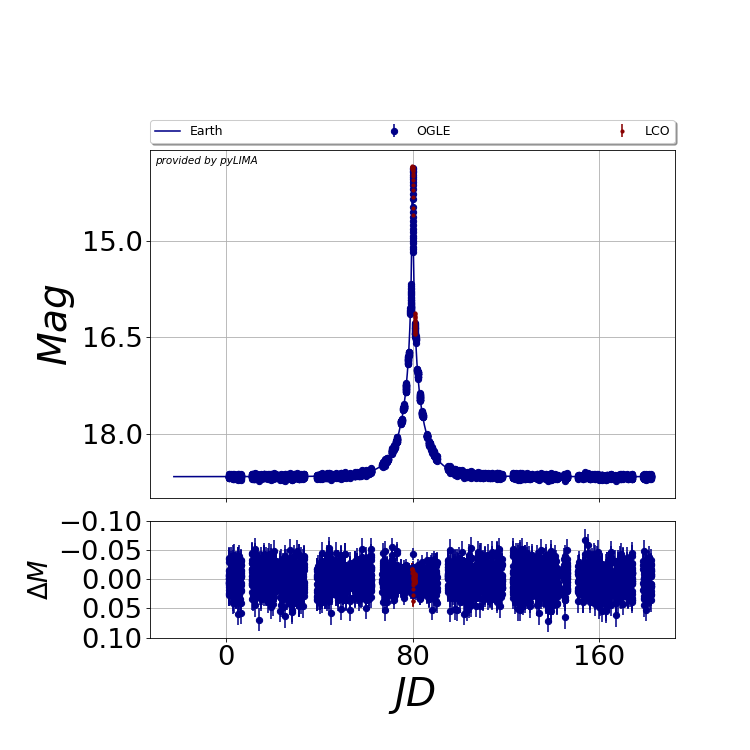

In [32]:
pyLIMA_plots.plot_lightcurves(fspl,my_fit3.fit_results['best_model'])
plt.show()

the mention of 'limb darkening'. therefore, we must set the microlensing limb-darkening coefficients (gamma) for each telescope.

In [33]:
your_event.telescopes[0].ld_gamma = 0.5
your_event.telescopes[1].ld_gamma = 0.5

In [34]:
my_fit4 = DE_fit.DEfit(fspl)
my_fit4.fit()

DE converge to objective function : f(x) =  20412.87180944467
DE converge to parameters : =  ['79.93115924041867' '0.008214790000444727' '10.098855767850864'
 '0.022599705592362233']
fit  : Differential Evolution fit SUCCESS
best_model: [7.99311592e+01 8.21479000e-03 1.00988558e+01 2.25997056e-02] -ln(likelihood) 20412.87180944467


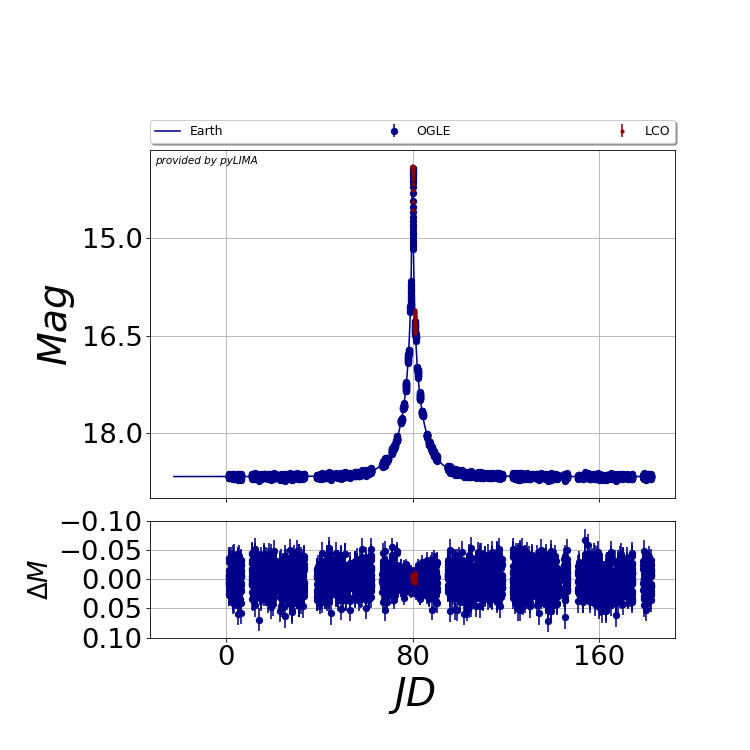

In [35]:
plt.close('all')
pyLIMA_plots.plot_lightcurves(fspl,my_fit4.fit_results['best_model'])
plt.show()

using the results of the previous good fit as initial guesses for mcmc

In [36]:
guess_parameters = my_fit4.fit_results['best_model']
print(guess_parameters)

[7.99311592e+01 8.21479000e-03 1.00988558e+01 2.25997056e-02]


In [37]:
from pyLIMA.fits import MCMC_fit

my_fit5 = MCMC_fit.MCMCfit(fspl)
my_fit5.model_parameters_guess = guess_parameters
my_fit5.fit()

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [79.93115924041867, 0.008214790000444727, 10.098855767850864, 0.022599705592362233]


100%|███████████████████████████████████████| 5000/5000 [00:54<00:00, 91.29it/s]


fit  : Monte Carlo Markov Chain (Affine Invariant) fit SUCCESS
best_model: [7.99309809e+01 8.16640965e-03 1.01072232e+01 2.25999520e-02
 2.91897666e+03 2.06954295e+02 9.26784874e+04 4.91040706e+04] ln(likelihood) -20416.981065155862


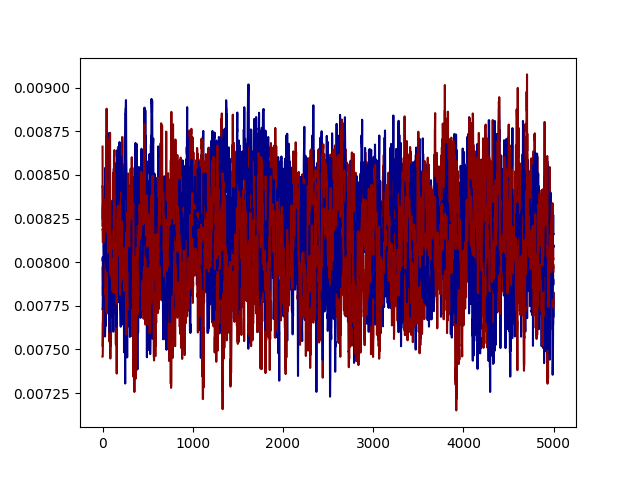

In [38]:
plt.close('all')
plt.plot(my_fit5.fit_results['MCMC_chains'][:,:,1])
plt.show()

In [39]:
MCMC_results = my_fit5.fit_results['MCMC_chains']
print ('Parameters', ' Model','   Fit','     Errors')
print ('-----------------------------------')
print ('t_0:', '        79.9309 ',str(np.median(MCMC_results[1000:,:,0]))[:7],'',str(np.std(MCMC_results[1000:,:,0]))[:7])
print ('u_0:', '        0.00826 ',str(np.median(MCMC_results[1000:,:,1]))[:7],'',str(np.std(MCMC_results[1000:,:,1]))[:7])
print ('t_E:', '        10.1171 ',str(np.median(MCMC_results[1000:,:,2]))[:7],'',str(np.std(MCMC_results[1000:,:,2]))[:7])
print ('rho:', '        0.02268 ',str(np.median(MCMC_results[1000:,:,3]))[:7],'',str(np.std(MCMC_results[1000:,:,3]))[:7])

Parameters  Model    Fit      Errors
-----------------------------------
t_0:         79.9309  79.9308  0.00081
u_0:         0.00826  0.00812  0.00025
t_E:         10.1171  10.1085  0.03924
rho:         0.02268  0.02261  0.00011


In [40]:
from matplotlib.pyplot import hist2d
from matplotlib.colors import LogNorm

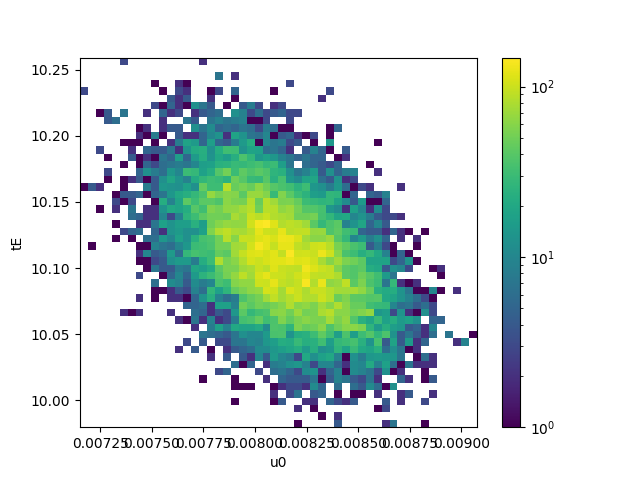

In [41]:
plt.close('all')
plt.hist2d(MCMC_results[1000:,:,1].ravel(),MCMC_results[1000:,:,2].ravel(), norm=LogNorm(), bins=50)
plt.xlabel('u0')
plt.ylabel('tE')
plt.colorbar()
plt.show()